![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# cargamos el dataset a un dataframe
dfhosp=pd.read_excel(r'C:\Users\p2_ge\Documents\bootcamp\M6\Proyecto Integrador\Propuesta 1\proyecto-machine-learning-clasificacion-enfermedades\BBDD_Hospitalización.xlsx')

c:\Users\p2_ge\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [24]:
dfhosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [3]:
dfhosp.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [9]:
# se buscan los valores nulo en la columna obejtivo que es HOSPITALIZACION
dfhosp[dfhosp['HOSPITALIZACION'].isna()]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
31,63.0,NO,NO,10.8,NO,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
100,74.0,NO,NO,5.8,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
109,61.0,NO,NO,7.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#quitamos filas von valores nulos de la columna HOSPITALIZACION
dfhosp_limpio=dfhosp.dropna(subset='HOSPITALIZACION').copy()

In [36]:
# vemos que aun hay valores faltantes en la columna PSA
dfhosp_limpio[dfhosp_limpio.PSA.isna()]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
9,44.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0
76,57.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,18.0,NO,NO,HIPERPLASIA PROSTATICA,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
103,60.0,NO,NO,NaN,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,16.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
121,62.0,NO,NO,NaN,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [80]:
# se cambian valores nulos de la columna PSA con el promedio de cada categoria de hospitalización
dfhosp_limpio.loc[dfhosp_limpio.HOSPITALIZACION=='SI', 'PSA'] =dfhosp_limpio.PSA[dfhosp_limpio.HOSPITALIZACION=='SI'].fillna(value=round(dfhosp_limpio.PSA[dfhosp_limpio.HOSPITALIZACION=='SI'].mean(),1))
dfhosp_limpio.loc[dfhosp_limpio.HOSPITALIZACION=='NO', 'PSA'] = dfhosp_limpio.PSA[dfhosp_limpio.HOSPITALIZACION=='NO'].fillna(value=round(dfhosp_limpio.PSA[dfhosp_limpio.HOSPITALIZACION=='NO'].mean(),1))
# corroboramos que ya no hay nulos en la columna PSA
dfhosp_limpio[dfhosp_limpio.PSA.isna()]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC


In [98]:
# se ven las filas con valores nulos de la columna BIOPSIAS PREVIAS
dfhosp_limpio[dfhosp_limpio['BIOPSIAS PREVIAS'].isna()]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
92,58.0,NO,NO,7.80,NaN,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [100]:
#se elimna las filas con valores nulos de la columna Biopisias previas, pertencen al grupo de personas que no son hospitalizadas
#y no impacatara mayormente al modelo, igual los otros datos de toda la fila no son de mayor relevancia al modelo y solo son dos filas eliminadas
dfhosp_limpio.drop(dfhosp_limpio[dfhosp_limpio['BIOPSIAS PREVIAS'].isna()].index,inplace=True)

In [105]:
#se checan las filas con valores nulos de la columna ENF. CRONICA PULMONAR OBSTRUCTIVA
dfhosp_limpio[dfhosp_limpio['ENF. CRONICA PULMONAR OBSTRUCTIVA'].isna()]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
566,67.0,NO,NO,8.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [106]:
#se checan que tipo de datos contiene, y vemos que son categoricos
dfhosp_limpio['ENF. CRONICA PULMONAR OBSTRUCTIVA'].unique()

array(['NO', 'SI, EPOC', 'SI, ASMA', 'SI', nan], dtype=object)

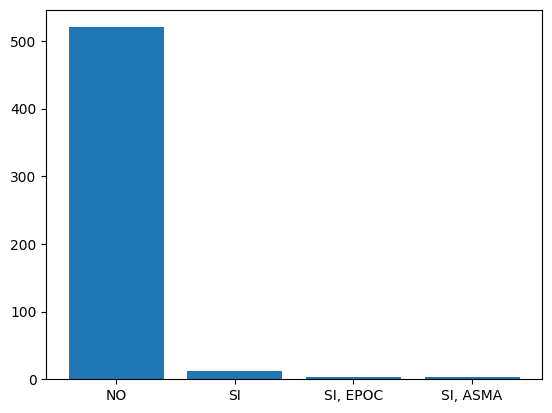

In [129]:
#la mayoria de pacientes que no han sido hospitalizados no tiene enfermedades cronico pulmonar obstructiva
#por lo tanto 'NO' sera el valor con el que rellenaremos los nulos de la columna ENF. CRONICA PULMONAR OBSTRUCTIVA
plt.bar(dfhosp_limpio['ENF. CRONICA PULMONAR OBSTRUCTIVA'][dfhosp_limpio.HOSPITALIZACION=='NO'].value_counts().index,dfhosp_limpio['ENF. CRONICA PULMONAR OBSTRUCTIVA'][dfhosp_limpio.HOSPITALIZACION=='NO'].value_counts())
plt.show()
#se rellenan con el valor 'NO' ya que es la moda en el la columna ENF. CRONICA PULMONAR OBSTRUCTIVA
dfhosp_limpio['ENF. CRONICA PULMONAR OBSTRUCTIVA'].fillna('NO',inplace=True)

In [153]:
dfhosp_limpio['AGENTE AISLADO'].mode()

0    NO
Name: AGENTE AISLADO, dtype: object

In [155]:
#en la columna AGENTE AISLADO tenemos 17 valores nulos, de los cuales todos son NO hospitalizados por lo cual se le imputara el valor 'NO' a los valores nulos
print(dfhosp_limpio['AGENTE AISLADO'].value_counts(dropna=False),'\n','\n')
print(dfhosp_limpio[['AGENTE AISLADO','HOSPITALIZACION']][dfhosp_limpio['AGENTE AISLADO'].isna()].value_counts(dropna=False))
dfhosp_limpio['AGENTE AISLADO'].fillna('NO',inplace=True)

AGENTE AISLADO
NO                        538
NaN                        17
E.COLI                      6
PSEUDOMONAS AERUGINOSA      2
Name: count, dtype: int64 
 

AGENTE AISLADO  HOSPITALIZACION
NaN             NO                 17
Name: count, dtype: int64


In [156]:
#corroboramos que ya no tenemos valores nulos
dfhosp_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       563 non-null    float64
 1   DIABETES                                                                   563 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 563 non-null    object 
 3   PSA                                                                        563 non-null    float64
 4   BIOPSIAS PREVIAS                                                           563 non-null    object 
 5   VOLUMEN PROSTATICO                                                         563 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                        

In [ ]:
#cambiamos la primer letra a mayúscula y el resto a minúscula tanto en el nombre de las columnas como en los valores del dataframe
columnas=dfhosp_limpio.columns.tolist()
columnas.remove(['PSA','CUP',ITU])

In [164]:
columnas_nuevas:{}
for a in :
    columnas_nuevas={a:a.capitalize()}

Edad
Diabetes
Hospitalización ultimo mes
Psa
Biopsias previas
Volumen prostatico
Antibiotico utiliazado en la profilaxis
Numero de muestras tomadas
Cup
Enf. cronica pulmonar obstructiva
Biopsia
Numero de dias post biopsia en que se presenta la complicación infecciosa
Fiebre
Itu
Tipo de cultivo
Agente aislado
Patron de resistencia
Hospitalizacion
Dias hospitalizacion mq
Dias hospitalización upc


In [157]:
#proseguimos a cambiar el tipo de dato de las columnas

# cambiar a valores numericos las columnas categoricas para poder hacer los modelos de prediccion mas adelante


Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

Para el caso de las variables numéricas, ¿Es necesario normalizar?

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 